<h1 align=center><font size=5>3. Análisis y visualización de datos.</font></h1>
<h1 align=center><font size=3>Innovation Lab, IBM Uruguay</font></h1>



El objetivo de este notebook es introducir los principales conceptos de __data science__ con Python.
Se estudiarán las bases del análisis y visualización de datos mientras se confronta el problema de estimar el precio de auto usados. Para eso se agregará como asset a nuestro proyecto en Watson studio una base de datos (en formato .csv) que contiene varias características de autos usados, incluyendo su precio de venta.


La base de datos se puede descargar en el siguiente link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.


<h2><font size=4>1. Introducción </font></h2>

En primer lugar, se importan las librerías de tratamiento de datos vistas en el curso.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

La base de datos con la que trabajaremos esta en formato _csv_ (i.e: comma separated values). 

Utilizaremos la biblioteca pandas para convertirlo en un __data frame__ : __df__ dónde cada auto usado es una fila y cada columna es una característica de ese auto.

El comando _df.head(n)_ nos permite visualizar las características de los primeros _n_ autos.

In [2]:
used_cars_dataset = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(used_cars_dataset, header = None)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers


El metodo __loc()__ nos permite visualizar algunas secciones del cuadro de datos y acceder a filas/columnas específicas.


In [3]:
df.loc[[9, 44, 45, 129]]
df.loc[1:100, "wheel-base": "price"]
df[["city-mpg", "price", "wheel-base"]]
df.loc[1:100, :]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499
97,1,103,nissan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
98,2,168,nissan,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249
99,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949


<h2><font size=3>1. 1. Explorando el data set.</font></h2>

Es importante explorar la base de datos antes de comenzar con el procesamiento para saber a que tipo de datos nos enfrentamos.

In [4]:
print("Tipos de cada columna: \n")
df.dtypes

Tipos de cada columna: 



symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000



Se puede observar que el tamaño promedio de motor es: 129.9 cm^3 y que el máximo de millas por galón es: 49 mpg. 

El método __value counts__ devuelve el número de items en una categoría. Es muy útil para visualizar variables categóricas.

In [6]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [7]:
df.replace("?", np.nan, inplace = True)

missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Se puede observar que hay muchos valores faltantes: "?" o "NaN". Se tiene que tomar una decisión respecto a estas entradas: borrarlas o reemplazarlas.

Las columnas con valores de precio faltantes serán eliminadas ya que no nos serán de utilidad para estimar. 
Sin embargo, estimaremos el resto de los valores faltantes por el promedio de uss columnas.


In [8]:
df.replace("?", np.nan, inplace = True)

df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

df["price"] = df["price"].astype(int, copy=True)

In [43]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [10]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<h3><font size=3>1.2  Pre-procesamiento </font></h3>

El pre-procesamiento es una etapa vital en la construcción de modelos precisos. 

Una herramienta importante es la __Estandarización__. Esto significa llevar los datos a un formato común para hacer comparaciones significativas. Una técnica muy utilizada es la __estandarización normal__ que consiste en sustraer la media y dividir por la desviación estándar. En las columnas estandarizadas, el promedio pasa a ser 0 y la desviación estandar pasa a ser 1. 

Estandarizar nos asegura que el modelo no priorize algunas características por el simple hecho de que sus valores son naturalmente grandes. 



In [11]:
#df["length"] = (df["length"]-df["length"].mean()) / df["length"].std()


También podemos re escalar la columna utilizando el StandardScaler de la librería _sklearn.preprocessing_. 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["length"]])
df["length"] = scaler.transform(df[["length"]])

Se le denomina __Binning__ al proceso de transformar variables numéricas continuas en "bins" o "cajones" discretos para hacer un análisis _categórico_.
Para realizar un binning, se puede usar el método _pd.cut_. 

In [13]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
df['horsepower-binned'] = pd.cut(df['horsepower'], np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4), labels=['Low', 'Medium', 'High'], include_lowest=True )
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

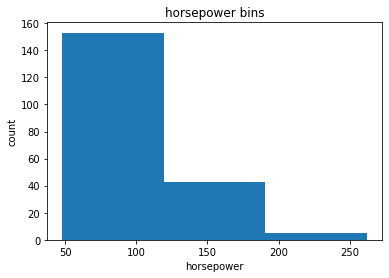

In [44]:
# Horsepower histograma con 3 bins
plt.hist(df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h2><font size=4>2. Data Analysis </font></h2>


El objetivo de nuestro análisis será determinar __cuales características tienen un impacto__ en el precio y cuales no lo influencian.

<h2><font size=3> 2.1 Correlation analysis </font></h2>

In [45]:
import seaborn as sns

La __correlación__ es una medida de influencia entre variables.


El coeficiente de correlación __Pearson__ nos da una estimación de la dependencia lineal entre dos variables.
<p>El coeficiente es un valor entre -1 y 1 , dónde:</p>
<ul>
    <li><b>1</b>: Relación lineal positiva.</li>
    <li><b>0</b>: No hay relación lineal entre las variables.</li>
    <li><b>-1</b>:Relación lineal negativa.</li>
</ul>

In [16]:
df.corr("pearson")

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.182196,0.075776,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,0.371297,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,0.579688,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,0.614972,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.086901,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,0.758001,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,0.822636,-0.650546,-0.679571,0.872335
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,-0.214392,0.331425,0.268465,0.071107
horsepower,0.075776,0.371297,0.579688,0.614972,-0.086901,0.758001,0.822636,-0.214392,1.000000,-0.822102,-0.804592,0.809729
city-mpg,-0.035527,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,0.331425,-0.822102,1.000000,0.972044,-0.686571



__¿Qué nos dice verdaderamente este cuadro de correlación?__

Podemos observar que :
- Una relación lineal entre el precio y la altura del auto es improbable.
- Una relación lineal positiva entre el precio y el tamaño del motor es muy probable.

Visualicemos estas relaciones:

(0, 56180.86695643829)

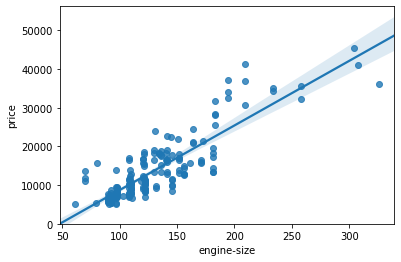

In [17]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

En la gráfica se puede observar que a medida que el tamaño del motor crece, el precio crece con una relación aproximadamente lineal.

Veamos el caso del precio y la altura del auto.

(3081.851674230944, 47436.148325769056)

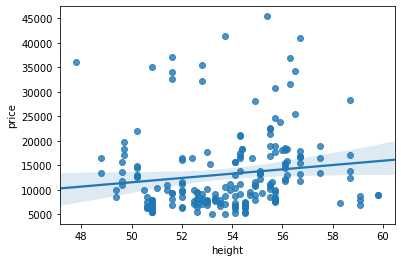

In [18]:
sns.regplot(x = df["height"], y = df["price"])
plt.ylim()

Claramente, los puntos parecen distribuidos aleatoriamente. No existe una relación lineal evidente entre la altura de un auto y su precio de reventa. 

La herramienta matemática para evaluar si una correlación es significativa es el __"p-value"__. 

<ul>
    <li>p-value $<$ 0.001: Evidencia fuerte que la correlación es significativa.</li>
    <li>p-value  $<$ 0.05: Evidencia moderada que la correlación es significativa.</li>
    <li>p-value $<$ 0.1: Evidencia pobre que la correlación es significativa.</li>
    <li>p-value $>$ 0.1: No hay evidencia de que exista una correlación entre las variables.</li>
</ul>

Veamos cual es el __"p-value"__ para las correlaciones mencionadas.

In [19]:
from scipy import stats

In [20]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("El coeficiente de correlacion entre el tamaño del motor y el precio es", pearson_coef, " con un P-value de P =", p_value)  

pearson_coef1, p_value1 = stats.pearsonr(df['compression-ratio'], df['price'])
print("El coeficiente de correlacion entre el compression ratio y el precio es", pearson_coef1, " con un P-value de P =", p_value1)  

pearson_coef2, p_value2 = stats.pearsonr(df['highway-mpg'], df['price'])
print("El coeficiente de correlacion entre highway mpg y el precio es", pearson_coef2, " con un P-value de P =", p_value2)

El coeficiente de correlacion entre el tamaño del motor y el precio es 0.8723351674455181  con un P-value de P = 9.265491622201286e-64
El coeficiente de correlacion entre el compression ratio y el precio es 0.07110732668194145  con un P-value de P = 0.3158110188729282
El coeficiente de correlacion entre highway mpg y el precio es -0.7046922650589529  con un P-value de P = 1.7495471144477352e-31


Por lo tanto, si quisiesemos estimar el precio de un auto usado sólo utilizando el tamaño del motor y el ratio de compresión, sería sabio sólo tomar en cuenta el tamaño del motor y realizar un ajuste lineal.


<h2><font size=3> 2.3 Conclusion </font></h2>

Realizando el análisis de correlación, se puede concluir que el precio de un auto usado depende linealmente de algunas de las características del cuadro de datos. Estas variables son:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore
- Drive-wheels


<h2><font size=4>3. Desarrollando el modelo </font></h2>


Habiendo __analizado los datos__ y habiendo definido que __características__ son importantes en la __predicción__ del precio de un auto usado, estamos prontos para construir un modelo. 

__¿Cómo construir un modelo?__


<h2><font size=3> 3.1 Regresión lineal </font></h2>

A efectos del ejercicio, asumamos que el precio del auto depende solamente del consumo (milles per gallon).
Si existe una relación lineal entre las varibales, seremos capaz de hallar los valores de A y B de la ecuación:

$$ price = highway\_mpg * A + B $$


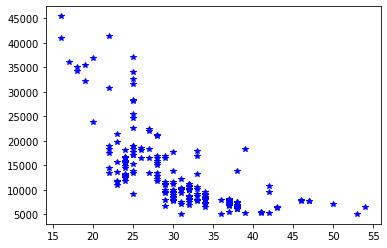

In [21]:
plt.plot(df[["highway-mpg"]], df["price"], "*b")

Para hallar estos parámetros utilizamos la biblioteca __sklearn__.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

pipeline_org = Pipeline( steps = [ ( "classifier", LinearRegression() ) ] )
pipeline_org.fit( X, y )
pickle.dump( pipeline_org, open( "used_car_prediction_model.pkl", 'wb') )
!mkdir model-dir
!cp tent-prediction-model.pkl model-dir
!tar -zcvf tent-prediction-model.tar.gz tent-prediction-model.pkl

In [25]:
b = lm.intercept_
a = lm.coef_

x = df["highway-mpg"]

print("a =", a, "b=", b)


a = [-821.73337832] b= 38423.305858157386


Nuestro modelo es entonces:
$$ price = 38423.31 - 821.73 x highway\_mpg $$

Visualicemos el modelo:

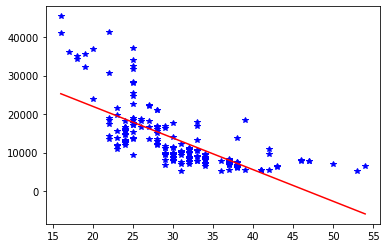

In [26]:
plt.plot(df[["highway-mpg"]], df["price"], "*b")
x = np.linspace(min(df["highway-mpg"]), max(df["highway-mpg"]), len(df["highway-mpg"]))
y = x*a + b
plt.plot(x, y, "-r")

Por lo tanto, para estimar el precio de un auto usado, debemos multiplicar el consumo por a y sumarle b.

<h2><font size=3> 3.2 Regresión Lineal Multi-varibale </font></h2>


Algunas de las variables correlacionadas con el precio son:
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

$$
price = A*horsepower + B*Curb\_weight + C*Engine\_size + D*highway\_mpg + E 
$$

Hallaremos las constantes A, B, C, D y E que mejor se ajustan a nuestros datos.



In [27]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [28]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
(A, B, C, D) = lm.coef_
E = lm.intercept_
print("A =", A, "B= ", B, "C=", C, "D=", D, "E=", E)

A = 53.66247317253279 B=  4.709386939614349 C= 81.44600166887584 D= 36.550162672729385 E= -15831.930960299494


De dónde, nuestro modelo lineal de varias variables es:

$$ price = 53.7*horsepower + 4.71*Curb\_weight + 81.4*Engine\_size + 36.5*highway\_mpg - 15832 $$

Probemoslo:

In [30]:
df.loc[[4]][["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

,horsepower,curb-weight,engine-size,highway-mpg
4,115,2824,136,22


In [31]:
price_used_audi = 53.7*df.loc[4]["horsepower"] + 4.71*df.loc[4]["curb-weight"] + 81.4*df.loc[4]["engine-size"] + 36.5*df.loc[4]["highway-mpg"] - 15832
print("Precio de un audi usado: {}".format(price_used_audi))

Precio de un audi usado: 15517.940000000002


<h2><font size=3> 3.3 Regresión Poliniomial </font></h2>

Esta vez no aproximaremos la el precio por un modelo lineal, sino que por un modelo polinomico que tiene mayor expresión pero corre el riesgo de caer en Overfitting.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x = df['highway-mpg']
y = df['price']

In [35]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


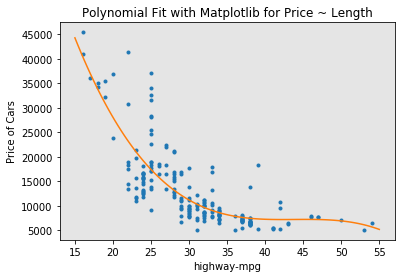

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
pr=PolynomialFeatures(degree=2)

In [38]:
Z_pr=pr.fit_transform(Z)

<h2><font size=3> 4. ¿Cómo cuantificar el éxito del modelo? </font></h2>

 
Un usual para medir la performance de un modelo es:
<b>R-squared</b>

<p>R squared, también conocido cómo coeficiente de determinación se usa para determinar cuan cerca los datos están del modelo calculado.</p>
    
Cuando comparamos modelos, el modelo con mayor R-squared se aproxima mejor a los datos.

__Modelo lineal__

In [39]:
lm.fit(X, Y)
print('El R-square es: ', lm.score(X, Y))

El R-square es:  0.4965911884339175


__Modelo lineal de varias variables__

In [40]:
lm.fit(Z,Y)
print('El R-square es: ', lm.score(Z, Y))

El R-square es:  0.8094390422815299


__Modelo polinomial__

In [41]:
from sklearn.metrics import r2_score

In [42]:
r_squared = r2_score(Y, p(x))
print('El R-square es: ', r_squared)

El R-square es:  0.6741946663906515


__Conclusion__


El modelo con mejor valor de error es el Modelo lineal de varias variables.